In [45]:
# import needed libraries for all plot and numbering stuff
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# [CONFIGS] --------------------------------------
mpl.rcParams['figure.dpi'] = 120

![](./assets/thumbnail.jpg)

# **Aufgaben 5** - *z-Transformation*

## Aufgabe 1

Berechnen Sie die z-Transformierten $X(z)$ der Folgen unter Benutzung der Eigenschaften und Regeln der z-Transformation:

>a. $x[k]=k^2\cdot\varepsilon[k]$

$$
k^2\cdot \varepsilon[k] \longleftrightarrow \frac{z^2+z}{(z-1)^3}
$$

>b. $x[k]=k\cdot a^{k−k_0}\cdot\varepsilon[k−k_0]$

$$
k\cdot a^{k−k_0}\cdot\varepsilon[k−k_0] \longleftrightarrow \frac{k_0\cdot z^{-k_0+2}-a\cdot k_0 \cdot z^{-k_0+1}+a\cdot z^{-k_0+1}}{(z-a)^2} = \frac{z^{-k_0}(k_0\cdot z^{2}-a\cdot k_0 \cdot z+a\cdot z)}{(z-a)^2}
$$

>c. $x[k]=k\cdot a^{k−k_0}\cdot\varepsilon[k]$

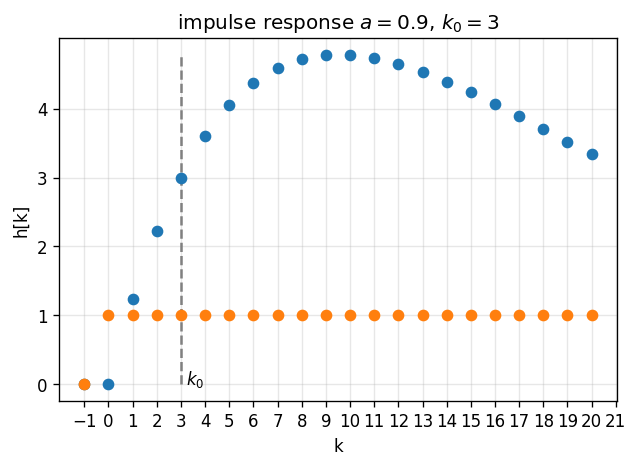

In [60]:
def get_y(x,a,k,k0):
  return a**(k-k0)*k*x[-1] # [-1] => takes last element of array
                                       # [-2] => take second last element of array
a = 0.9
k0 = 3
x = [0]
y = [0]
#k = -1, 0
for i in range(0,21):
  y.append(get_y(x,a,i,k0))
  x.append(1)
plt.vlines([3],[0],[max(y)], colors="gray", linestyles="dashed")
plt.text(k0+0.2, 0,"$k_0$")
plt.scatter(np.arange(-1,21,1),y, zorder = 3)
plt.scatter(np.arange(-1,21,1),x, zorder = 3)
plt.title(f'impulse response $a={a}$, $k_0={k0}$')
plt.xticks(np.arange(-1,22,1))
plt.yticks(np.arange(0,max(y),1))
plt.xlabel('k')
plt.ylabel('h[k]')
plt.grid(True, zorder = 0, alpha=0.3)
plt.show()

$$
k\cdot a^{k−k_0}\cdot\varepsilon[k] \longleftrightarrow 
$$

>d. $x[k]=k\cdot e^{−2k}\cdot\sin(Ω_0k)\cdot ε[k] $

$$
k\cdot e^{−2k}\cdot\sin(Ω_0k)\cdot ε[k] \longleftrightarrow
$$


(Hinweis: Eulersche Formel $\sin x=\frac{e^{jx}−e^{−jx}}{2j}$)

(aus T. Frey, M. Bossert, Signal- und Systemtheorie, Aufg. 4.2)

## Aufgabe 2

Berechnen Sie die z-Transformierten folgender Signale (ohne antikausale Signalanteile) unter Angabe des Konvergenzgebiets.

![alt text](https://drive.google.com/uc?id=1XMHvRu--_iePS0UgMUUL4ot1v91ucEeb)

(aus T. Frey, M. Bossert, Signal- und Systemtheorie, Aufg. 4.3)

## Aufgabe 3

Transformieren Sie das Signal gegeben durch

\begin{equation}
X(z)=\frac{z^3+\frac32z^2+z}{z−\frac12},\hspace{2mm}|z|>r_0
\end{equation}

in den Zeitbereich zurück.

$$
x[k]=\delta[k+2] + 2\cdot \delta[k+1] + 2 \cdot \left(\frac{1}{2}\right)^k\cdot\varepsilon[k]

## Aufgabe 4

Manche Signale (z.B. Börsenkurse) haben zickzackartige Verläufe, doch schaut man sich für die Bestimmung von Trends lieber geglättete Kurven an, bei welchen kurzzeitige Schwankungen unterdrückt sind. Dazu soll im Folgenden ein LTI-System entworfen werden.

> a. Geben Sie die Impulsantwort $h_5[k]$ und die dazugehörige Systemfunktion $H_5(z)$ eines diskreten LTI-Systems an, welches über die letzten fünf Eingangswerte mittelt.



> b. Wenden Sie das System $H_5(z)$ auf die Folge $x[k]$ im nachfolgenden Python-Skript an und betrachten Sie das Ergebnis.


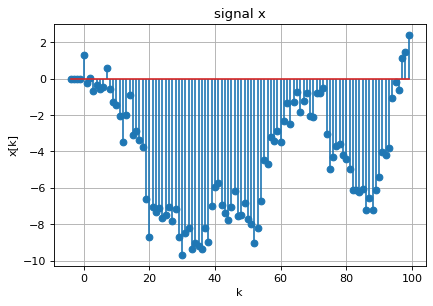

In [3]:
x = np.cumsum(np.concatenate((np.zeros(4),np.random.randn(100))))

plt.stem(range(-4,100),x)
plt.title('signal x')
plt.xlabel('k')
plt.ylabel('x[k]')
plt.grid(True)

> c. Es sind auch Mittelungen denkbar, die weiter in der Vergangenheit liegenden Werten weniger Gewicht geben. Machen Sie Vorschläge für entsprechende Impulsantworten. Welche Eigenschaft muss die Systemfunktion $H(z)$ generell erfüllen, damit die Ausgabe *erwartungstreu* ist, d.h., bei einem konstanten Eingangssignal $x[k]=c$ das konstante Ausgangssignal $y[k]=c$ anliegt?

## Aufgabe 5

Alternativ kann eine Folge mittels einer Rückkopplung des Ausgangssignals geglättet werden. Im Folgenden soll ein System untersucht werden, welches jeweils zum mit $a$ gewichteten momentanen Eingangswert den mit $b$ gewichteten vorhergehenden Ausgangswert addiert.

> a. Wie lauten entsprechend die Differenzengleichung und die Übertragungsfunktion?


> b. Welche Bedingungen müssen $a$ und $b$ erfüllen, so dass die Ausgabe erwartungstreu ist? Realisieren Sie das System in Python und vergleichen Sie die Resultate mit Aufgabe 4.